## 6-7. 다층 퍼셉트론으로 손글씨 분류하기
### 1. 숫자 필기 데이터 소개
숫자 필기 데이터는 사이킷런 패키지에서 제공하는 분류용 예제 데이터임. 0 ~ 9까지 손으로 쓴 이미지 데이터. load_digits() 명령으로 로드할 수 있다. 각 이미지는 0 ~ 15까지의 명암을 가지는 8x8=64 픽셀 해상도의 흑백 이미지임. 해당 이미지가 1,797개 있다.

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt #시각화를 위한 맷플롯립
from sklearn.datasets import load_digits
digits = load_digits()

In [4]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


0을 흰색 도화지, 0보다 큰 숫자들을 검은색 점이라고 상상해보면 숫자 0의 실루엣처럼 보임

In [5]:
print (digits.target[0])

0


In [6]:
print('전체 샘플의 수: {}'.format(len(digits.images)))

전체 샘플의 수: 1797


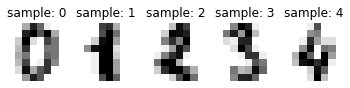

In [7]:
# 전체 샘플 1797개 중 상위 5개의 샘플만 시각화
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:5]): #5개의 샘플만 출력
    plt.subplot(2, 5, index +1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('sample: %i' % label)

In [8]:
for i in range(5):
    print(i, '번 인덱스 샘플의 레이블: ', digits.target[i])

0 번 인덱스 샘플의 레이블:  0
1 번 인덱스 샘플의 레이블:  1
2 번 인덱스 샘플의 레이블:  2
3 번 인덱스 샘플의 레이블:  3
4 번 인덱스 샘플의 레이블:  4


In [10]:
# 훈련 데이터와 레이블을 각각 X, Y에 저장
# digits.data 함수는 8x8행렬을 64차원의 벡터로 변환한 형태임.
print(digits.data[0])
X = digits.data   #이미지. 즉, 특성 행렬
Y = digits.target #각 이미지에 대한 레이블

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


### 2. 다층 퍼셉트론 분류기 만들기

In [11]:
import torch
import torch.nn as nn
from torch import optim

In [13]:
model = nn.Sequential(
    nn.Linear(64, 32), #input_layer = 64, hidden_layer1 = 32
    nn.ReLU(),
    nn.Linear(32, 16), #hidden_layer1 = 32, hidden_layer2 = 16
    nn.ReLU(),
    nn.Linear(16, 10)  #hidden_layer2 = 16, output_layer = 10
)

In [14]:
X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.int64)

In [15]:
loss_fn = nn.CrossEntropyLoss() #이 비용함수는 소프트맥스 함수를 포함하고 있음

In [16]:
optimizer = optim.Adam(model.parameters())

In [19]:
losses = []

In [21]:
for epoch in range(100):
    optimizer.zero_grad()
    y_pred = model(X) # forward연산
    loss = loss_fn(y_pred, Y)
    loss.backward()
    optimizer.step()
    
    if epoch % 10 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, 100, loss.item()))
              
    losses.append(loss.item())

Epoch    0/100 Cost: 2.644159
Epoch   10/100 Cost: 2.185431
Epoch   20/100 Cost: 1.983278
Epoch   30/100 Cost: 1.720703
Epoch   40/100 Cost: 1.451564
Epoch   50/100 Cost: 1.176492
Epoch   60/100 Cost: 0.900471
Epoch   70/100 Cost: 0.651608
Epoch   80/100 Cost: 0.459725
Epoch   90/100 Cost: 0.338111


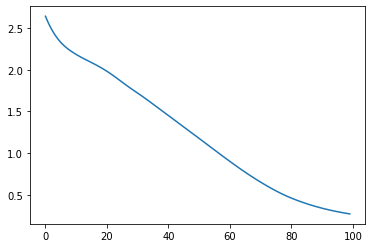

In [22]:
plt.plot(losses)

## 6-8. 다층 퍼셉트론으로 MNIST 분류하기
5장 소프트맥스 회귀에서 입력층과 출력층만 존재하는 단층 퍼셉트론에서 소프트맥스 함수를 활성화 함수로 사용하였음. <br>
이번 챕터에서는 은닉층을 추가로 넣어 다층 퍼셉트론 구현
### 1. 데이터 로드하기

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
from sklearn.datasets import fetch_openm1

ImportError: cannot import name 'fetch_openm1' from 'sklearn.datasets' (/home/guest/.local/lib/python3.7/site-packages/sklearn/datasets/__init__.py)

In [ ]:
mnist = fetch_openm1('mnist_784', version=1, cache=True)

In [3]:
import sys
print(sys.path)

['/home/guest/mygit/Pytorch/Pytorch_DL', '/usr/lib/python37.zip', '/usr/lib/python3.7', '/usr/lib/python3.7/lib-dynload', '', '/home/guest/.local/lib/python3.7/site-packages', '/usr/local/lib/python3.7/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.7/dist-packages/IPython/extensions', '/home/guest/.ipython']


In [ ]:
!pip uninstall scikit-learn

In [ ]:
!Y

In [ ]:
Y